# Aula 1 - Gráficos com Pandas

### Documentações

[Documentação Pandas Plot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)

### Pandas Plot

In [ ]:
!pip install pandas

In [71]:
# importando a biblioteca
import pandas as pd
import numpy as np
import seaborn as sns

In [72]:
# verificando as base disponíveis no seaborn
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [74]:
# importando algumas bases de dados
peng = sns.load_dataset('penguins')

In [75]:
flig = sns.load_dataset('flights')

In [76]:
peng.shape

(344, 7)

In [77]:
peng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [78]:
peng.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [79]:
peng.describe(include='object')

,species,island,sex
count,344,344,333
unique,3,3,2
top,Adelie,Biscoe,Male
freq,152,168,168


In [80]:
peng.describe(include=['object', 'category'])

,species,island,sex
count,344,344,333
unique,3,3,2
top,Adelie,Biscoe,Male
freq,152,168,168


In [81]:
flig.shape

(144, 3)

In [82]:
flig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


#### Gráfico de Barras

* Comparativo entre dados categóricos
* Comparativos mensais e anuais
* Exemplo: Comparar o total de vendas por estado

In [83]:
 # quantidade de pinguins por ilha
peng

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [85]:
peng.groupby('island')['species'].count()

island
Biscoe       168
Dream        124
Torgersen     52
Name: species, dtype: int64

In [87]:
peng['island'].value_counts(ascending=True)

Torgersen     52
Dream        124
Biscoe       168
Name: island, dtype: int64

In [89]:
peng.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


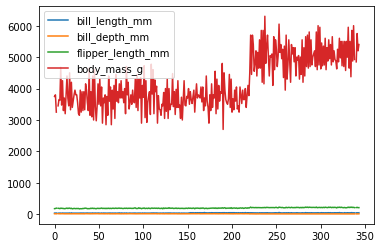

In [88]:
# plot puro
peng.plot()

In [93]:
peng['island'].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

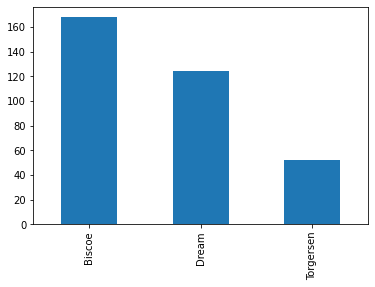

In [92]:
peng['island'].value_counts().plot.bar()

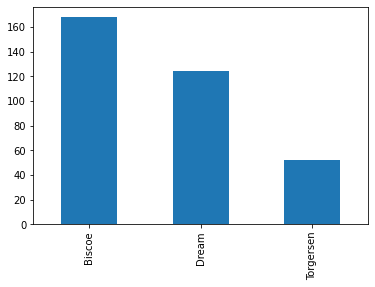

In [94]:
 # listando em gráfico de barras
peng['island'].value_counts().plot(kind='bar')

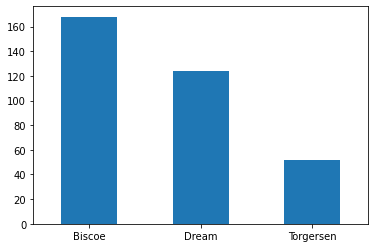

In [95]:
 # listando em gráfico de barras
peng['island'].value_counts().plot(kind='bar', rot=0)

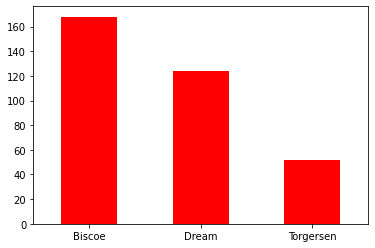

In [97]:
# mudando a cor do grafico
peng['island'].value_counts().plot(kind='bar', rot=0, color='red')

In [99]:
# agrupando os dados por ilha e sexo
peng.groupby(['island', 'sex'])['species'].count()

island     sex   
Biscoe     Female    80
           Male      83
Dream      Female    61
           Male      62
Torgersen  Female    24
           Male      23
Name: species, dtype: int64

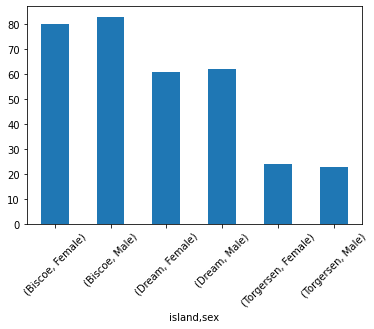

In [101]:
 # listando agrupammento em gráfico de barras
peng.groupby(['island', 'sex'])['species'].count().plot(kind='bar', rot=45)

In [104]:
peng_count_isl_sex = peng.groupby(['island', 'sex'])['species'].count()

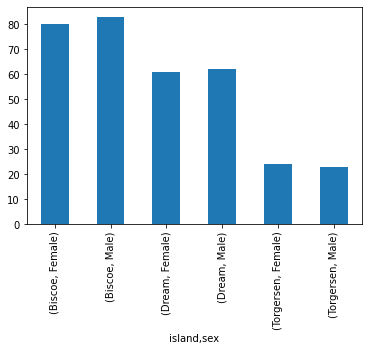

In [105]:
peng_count_isl_sex.plot(kind='bar')

In [109]:
# ajustando a coluna de sexo para transformar as linhas em colunas
peng_dummy = pd.get_dummies(peng, columns=['sex'])

In [112]:
peng_dummy.groupby('island').sum()[['sex_Female', 'sex_Male']]

,sex_Female,sex_Male
island,,
Biscoe,80,83
Dream,61,62
Torgersen,24,23


In [113]:
peng_dummy[['island', 'sex_Female', 'sex_Male']].groupby('island').sum()

,sex_Female,sex_Male
island,,
Biscoe,80,83
Dream,61,62
Torgersen,24,23


In [114]:
peng_dummy.groupby('island')[['sex_Female', 'sex_Male']].sum()

,sex_Female,sex_Male
island,,
Biscoe,80,83
Dream,61,62
Torgersen,24,23


In [31]:
# agrupando os dados novamente por ilha e sexo


In [32]:
# agrupando os dados novamente por ilha e sexo somente os dados de contagem


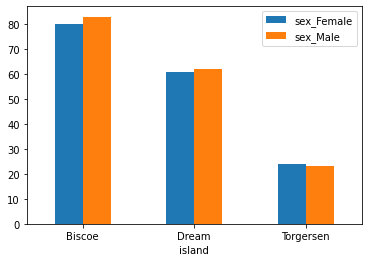

In [115]:
# listando agrupammento em gráfico de barras
peng_dummy.groupby('island')[['sex_Female', 'sex_Male']].sum().plot.bar(rot=0)

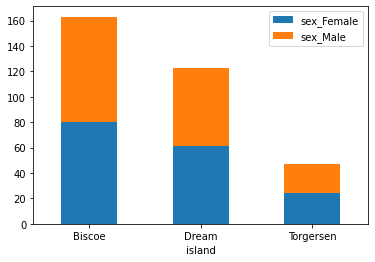

In [117]:
 # listando agrupammento em gráfico de barras empilhadas
peng_dummy.groupby('island')[['sex_Female', 'sex_Male']].sum().plot.bar(rot=0, stacked=True);

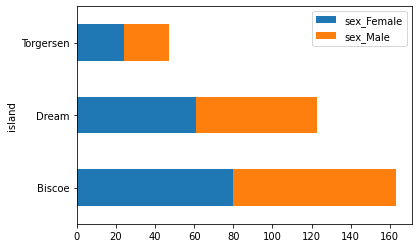

In [118]:
peng_dummy.groupby('island')[['sex_Female', 'sex_Male']].sum().plot.barh(stacked=True);

In [120]:
peng_dummy.groupby('island')[['sex_Female', 'sex_Male']].sum().reset_index()

,island,sex_Female,sex_Male
0,Biscoe,80,83
1,Dream,61,62
2,Torgersen,24,23


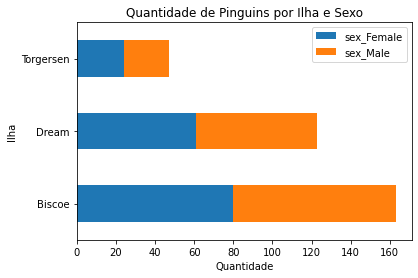

In [125]:
# Ajustando labels e legendas
g1 = peng_dummy.groupby('island')[['sex_Female', 'sex_Male']] \
  .sum() \
  .plot \
  .barh(rot=0, stacked=True)

g1.set_title('Quantidade de Pinguins por Ilha e Sexo')
g1.set_xlabel('Quantidade')
g1.set_ylabel('Ilha');

#### Gráfico de Linhas

* Evolução de um atributo no tempo
* Demonstrar sequência de um valor durante anos, meses, semanas ou dias
* Exemplo: Vendas durante os meses de um determinado ano


In [36]:
# revisão pivot
temperatura = pd.DataFrame([['jan','max',29],
                            ['jan','min',22],
                            ['fev','max',33],
                            ['fev','min',25],
                            ['mai','max',27],
                            ['mai','min',21]
                            ], columns=['mes','temp','val'])

In [126]:
# revisão pivot
# df.pivot(index, columns, value)
temperatura

,mes,temp,val
0,jan,max,29
1,jan,min,22
2,fev,max,33
3,fev,min,25
4,mai,max,27
5,mai,min,21


In [127]:
# revisão pivot
temperatura.pivot('mes', 'temp', 'val')

temp,max,min
mes,,
fev,33,25
jan,29,22
mai,27,21


In [128]:
# revisão pivot
temperatura.pivot('mes', 'temp', 'val').info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, fev to mai
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   max     3 non-null      int64
 1   min     3 non-null      int64
dtypes: int64(2)
memory usage: 72.0+ bytes


In [129]:
flig.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [130]:
flig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


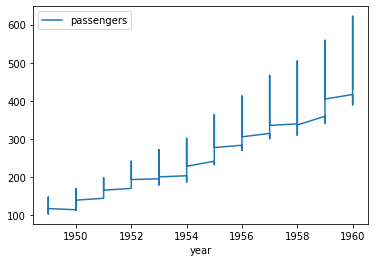

In [132]:
# listando em gráfico de linha por ano e passageiro
flig.plot.line(x='year', y='passengers');

In [133]:
# verificando novamente os dados
flig.groupby('year')['passengers'].sum()

year
1949    1520
1950    1676
1951    2042
1952    2364
1953    2700
1954    2867
1955    3408
1956    3939
1957    4421
1958    4572
1959    5140
1960    5714
Name: passengers, dtype: int64

In [42]:
# agrupando os dados por ano
flig.groupby('year')['passengers'].sum()

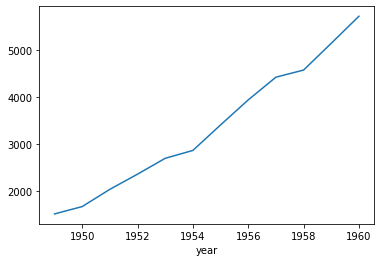

In [134]:
# listando em gráfico de linha por ano e passageiro
flig.groupby('year')['passengers'].sum().plot(kind='line')

In [136]:
flig.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [137]:
# fazendo um pivot para incluir o mês na anáise
flig.pivot('year', 'month', 'passengers')

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


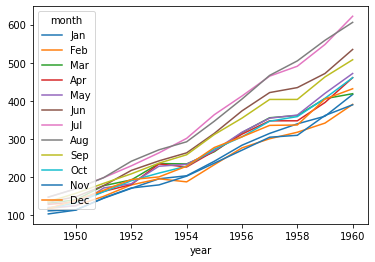

In [138]:
# listando em gráfico de linha por ano e passageiro quebrando por mês
flig.pivot('year', 'month', 'passengers').plot(kind='line')

#### Gráfico de Área

* Similar ao gráfico de linha
* Evidencia uma noção de proporção sobre o todo com a área desenhada
* Exemplo: Desconto em compras por meses


In [142]:
# trazendo um pivot filtrando alguns meses
meses = ['Jan', 'Feb', 'Mar']
flig.pivot('year', 'month', 'passengers')[meses]

month,Jan,Feb,Mar
year,,,
1949,112,118,132
1950,115,126,141
1951,145,150,178
1952,171,180,193
1953,196,196,236
1954,204,188,235
1955,242,233,267
1956,284,277,317
1957,315,301,356


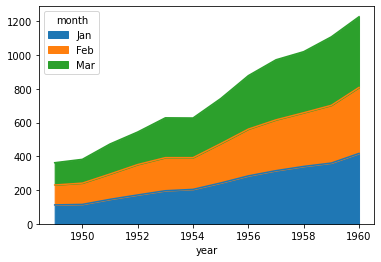

In [143]:
# verificando a análise pelo gráfico de área
flig.pivot('year', 'month', 'passengers')[meses].plot.area()

#### Gráfico de Dispersão

* Visão de comparação entre duas variáveis
* Indica o quantos uma variável pode ou não influenciar a outra
* Exemplo: Tempo de profissão e salário

In [146]:
# verificando os dados novamente
peng.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


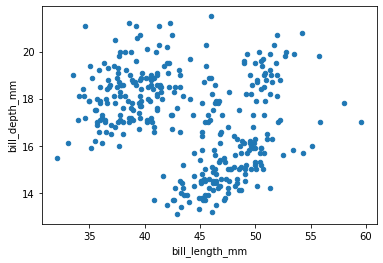

In [147]:
# comparando o tamanho e altura do bico do pinguim
peng.plot.scatter(x='bill_length_mm', y='bill_depth_mm')

In [150]:
# aplicando um filtro
peng[peng['species'] == 'Adelie'].head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


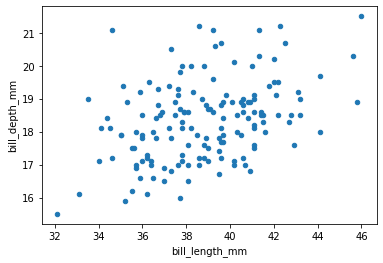

In [149]:
# comparando o tamanho e altura do bico do pinguim com filtro
peng[peng['species'] == 'Adelie'].plot.scatter(x='bill_length_mm', y='bill_depth_mm')

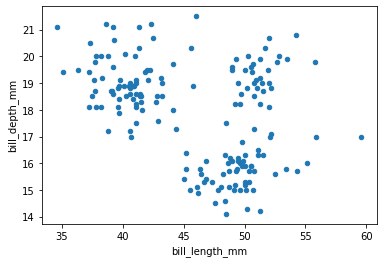

In [151]:
# comparando o tamanho e altura do bico do pinguim com outro filtro
peng[peng['sex'] == 'Male'].plot.scatter(x='bill_length_mm', y='bill_depth_mm')

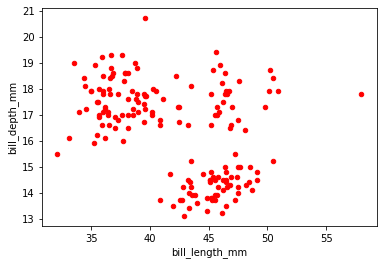

In [153]:
peng[peng['sex'] == 'Female'].plot.scatter(x='bill_length_mm', y='bill_depth_mm', color='red')

In [53]:
# juntando os dois gráficos
# comparando o tamanho e altura do bico do pinguim com outro filtro
peng[peng['sex'] == 'Male'].plot.scatter(x='bill_length_mm', y='bill_depth_mm')

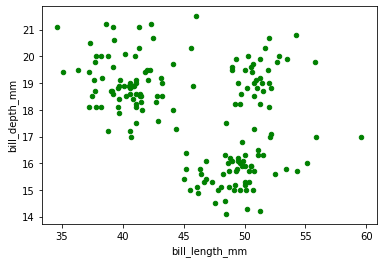

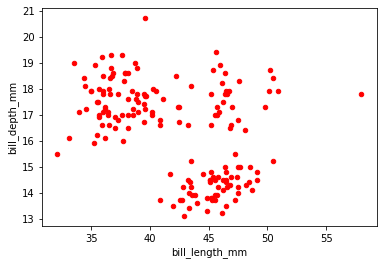

In [154]:
# juntando os dois gráficos
# comparando o tamanho e altura do bico do pinguim com outro filtro
g1 = peng[peng['sex'] == 'Male'].plot.scatter(x='bill_length_mm', y='bill_depth_mm', color='green')
g2 = peng[peng['sex'] == 'Female'].plot.scatter(x='bill_length_mm', y='bill_depth_mm', color='red')

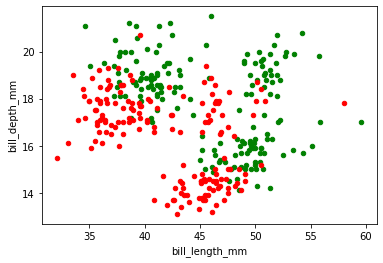

In [155]:
g1 = peng[peng['sex'] == 'Male'] \
      .plot.scatter(x='bill_length_mm', y='bill_depth_mm', color='green')
g2 = peng[peng['sex'] == 'Female'] \
      .plot.scatter(x='bill_length_mm', y='bill_depth_mm', color='red', ax=g1)

In [55]:
# Ajustando labels e legendas


#### Gráfico de Pizza

* Visão de um atributo comparado com o todo
* É o valor relativo de cada categoria analizada
* Exemplo: Proporção de vendas por produto


In [56]:
 # verificando a quantidade de pinguins por ilha


In [57]:
 # visualizando a quatidade de pinguins por ilha em uma pizza


In [58]:
# agrupando os dados por ilha e sexo com quantidade de pinguins


In [59]:
# visualizando a quatidade de pinguins por ilha em pizzas separadas por sexo


#### Gráfico de Caixa

* Visão de distribuição de uma variável
* Identificação de outliers
* Apresenta algumas respostas importantes sobre o dado em análise
* Exemplo: A distribuição dos salários em uma empresa

In [60]:
# verificando a base de dados dos pinguins


In [61]:
# verificando o boxplot de uma coluna


In [62]:
# consultando valores nulo


In [63]:
# separando o peso por sexo


In [64]:
# visualizando o boxplot separado por sexo


#### Histograma

* Visão de distribuição de uma variável
* Analisa a frequência/quantidade de uma coluna
* Similar ao gráfico de coluna, mas busca responder perguntas sobre a distribuição
* Exemplo: Faixa etária dos inscritos no enem 

In [65]:
# verificando o tamanho das nadadeiras


In [66]:
# exibindo em um histograma


In [67]:
# separando o tamanho das nadadeiras por sexo


In [68]:
# visualizando no histograma o tamanho das nadadeiras por sexo


In [69]:
# visualizando no histograma o tamanho das nadadeiras por sexo separados


### Atividade

Para resolver as questões abaixo utilizar o dataset [Titanic](https://github.com/mwaskom/seaborn-data/blob/master/titanic.csv).

In [70]:
import pandas as pd
import seaborn as sns

#### Questão 1

Criar um gráfico com a biblioteca Pandas que mostre a quantidade de pessoas por cidade de embarque, coluna embark_town no dataset.

#### Questão 2

Criar um gráfico com a biblioteca Pandas que mostre a quantidade de pessoas por cidade de embarque, coluna embark_town no dataset separados pelo sexo, coluna sex no dataset.

#### Questão 3

Criar um gráfico com a biblioteca Pandas que mostre o percentual pelo sexo das pessoas no Titanic.

#### Questão 4

Criar um gráfico com a biblioteca Pandas que mostre os outliers da idade das pessoas no Titanic, coluna age no dataset.

#### Questão 5

Criar um gráfico com a biblioteca Pandas que mostre os outliers da tarifa de embarque das pessoas no Titanic, coluna fare no dataset.

#### Questão 6

Criar um gráfico com a biblioteca Pandas que mostre a distribuição de idades das pessoas no Titanic, coluna age no dataset.

#### Questão 7

Criar um gráfico com a biblioteca Pandas que mostre a distribuição de idades das pessoas no Titanic, coluna age no dataset separados por sexo em dois gráficos.